# Evaluation Project - 1

# Baseball Case Study

* Problem Statement:


* This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 



* Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors



* Output: Number of predicted wins (W)

# SETP-1

1)Imported the required libraries.

2)Loaded the data set.

3)Renamed the column names.

4)Used different pandas methods to know about the dataset.

5)Checked for any missing values

6)Showed the data summary.

# Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np

#for plotting and EDA
import matplotlib.pyplot as plt
import seaborn as sns

#for model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#for spliting dataset into train and test
from sklearn.model_selection import train_test_split

#for model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [3]:
df=pd.read_csv('baseball.csv')#loading the data 

In [7]:
df.head()#Here data head shows

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [8]:
#checking dimensions of dataset
df.shape

(30, 17)

In [9]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Elaborated the given input features  :

**R**-----Runs, 
**AB**----At Bats,
**H**-----Hits, 
**2B**----Doubles, 
**3B**----Triples, 
**HR**----Homeruns, 
**BB**----Walks, 
**SO**----Strikeouts, 
**SB**----Stolen Bases, 
**RA**----Runs Allowed, 
**ER**----Earned Runs, 
**ERA**---Earned Run Average, 
**CG**----Complete Games, 
**SHO**---Shutouts, 
**SV**----Saves, 
**E**-----Errors


**Output** : Number of predicted wins (W)

In [10]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [11]:
#checkig Data types
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

# Checking and Treating missing values

In [12]:
#checking null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

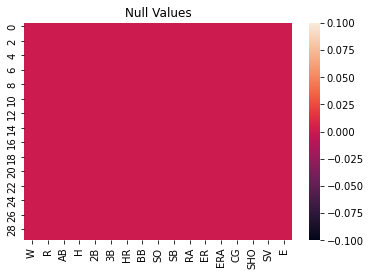

In [13]:
#heatmap for null values
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

* Hence, we cannot find any null values in the above Dataset

In [14]:
#statiscal summery
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Uni Variate Analysis

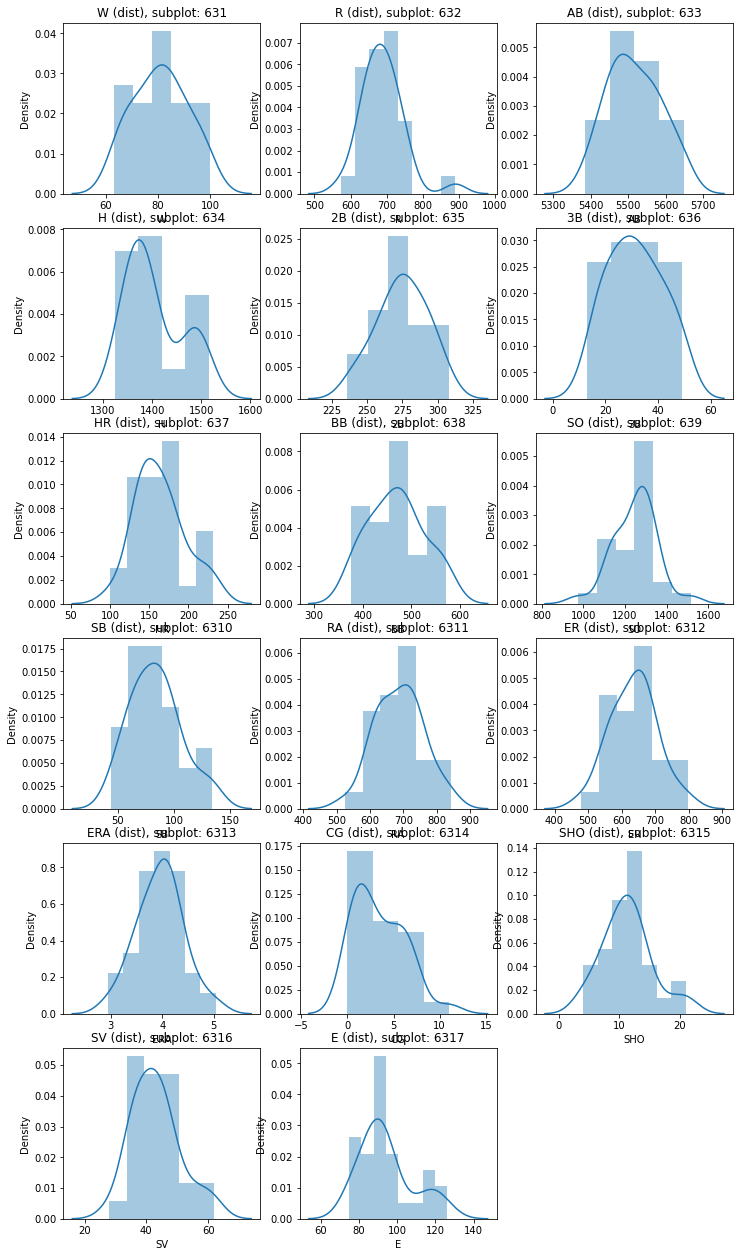

In [15]:
#Distplot for each column
Columns= df.columns

#  plot Numerical Data
a = 6  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(12,22))

for i in Columns:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1

plt.show()

* the Mean and median(50%) looks approx equal so there is less chance of outliers in the features.


* the Standerd deviation looks not normal for many of the features.


* the diffrence between values of min,25%,50%,75% and max is looks normal for the features.


* None of the graphs are perfectly bell shaped and seems to have some sort of skewness in them.

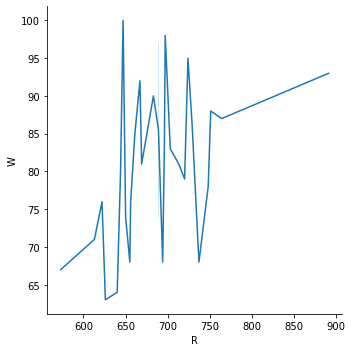

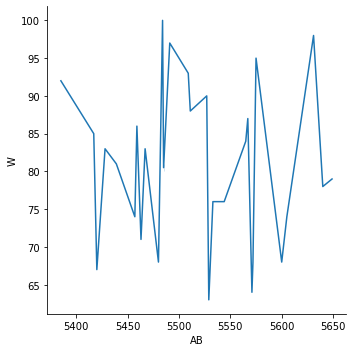

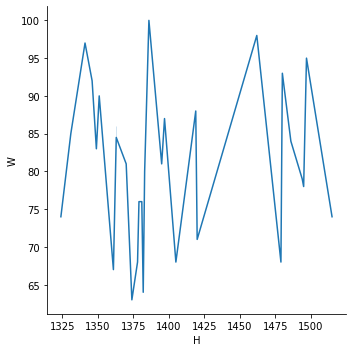

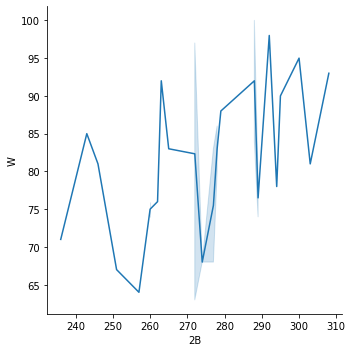

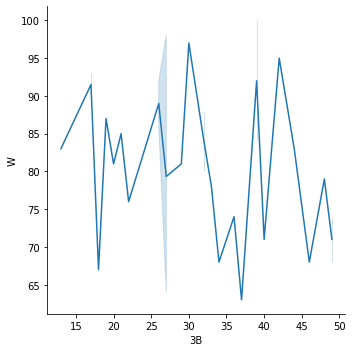

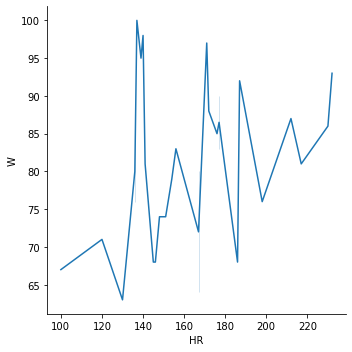

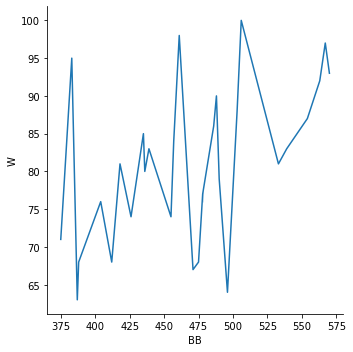

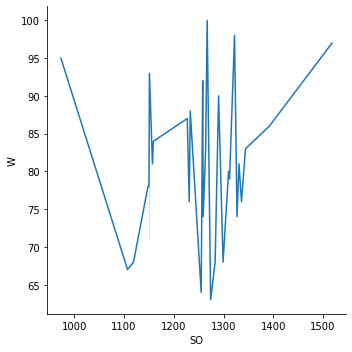

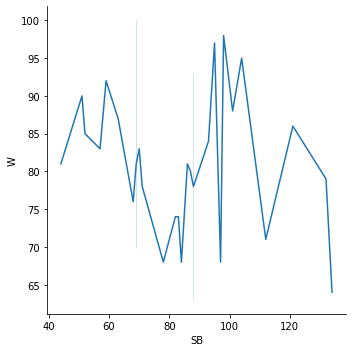

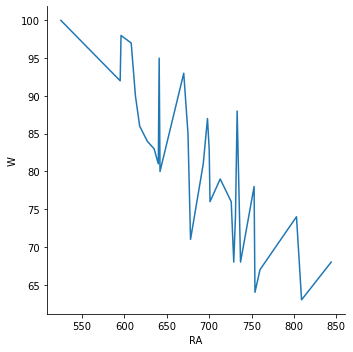

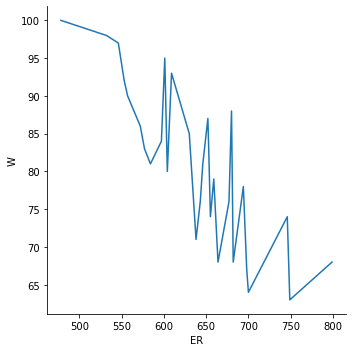

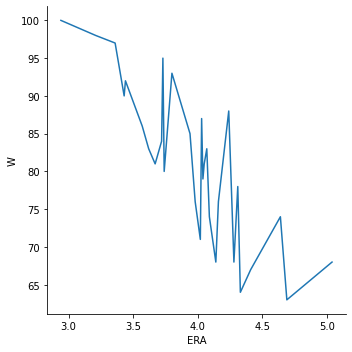

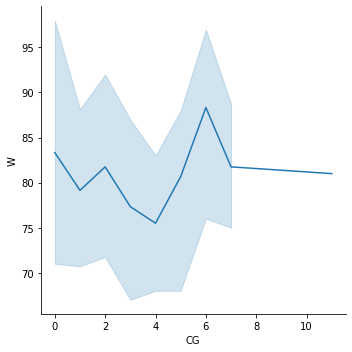

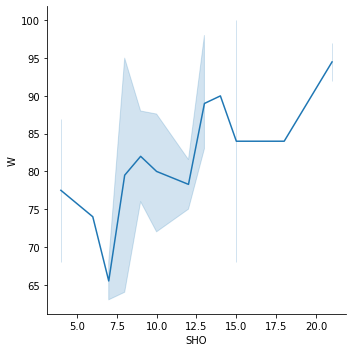

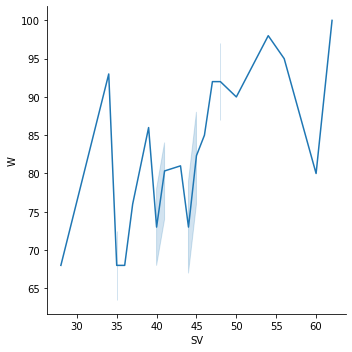

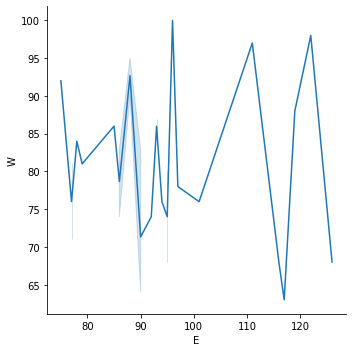

In [7]:
plot = 0
features = df.drop("W", axis=1)
for c, v in features.items():
    sns.relplot(x=c, y="W", kind="line", data=df)
    plot += 1
plt.show()

**By taking a look at all the line plots corresponding to the "Wins" column shows how those feature are related with the contribution on getting those particular numbers. Some of them are directly proportional while others are either inversely proportional to our label or do not have much to offer**

**Therefore we can say that the relationships between the label and all the features can be viewed from above graphs: All of the above features (except the errors) are positively correlated with our label In case the number of runs increases then the chance of win increases obviously In case the doubles increase then the chance of win increases In case the triples increases then the chance of win increases In case the home runs increases then the chance of win increases In case the walks on balls increases then the chance of win increases In case the strike outs increases then the chance of win increases for the opposite team In case the stolen bases increases then the chance of win increases again for the opposite team In case the runs allowed increases then the chance of win increases In case the earned run and earned run average increases the chance of win increases automatically**

# Bivariate Analysis

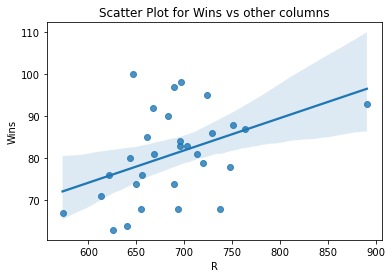

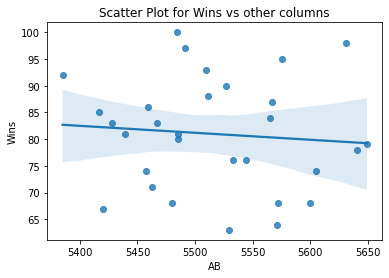

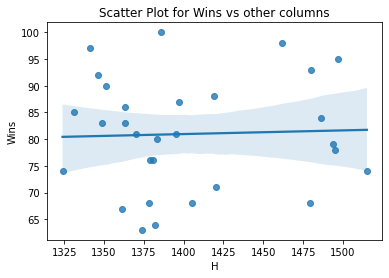

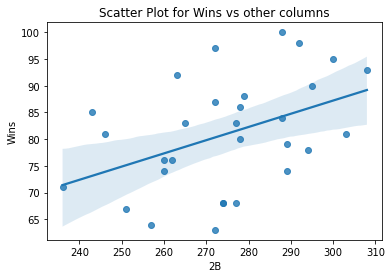

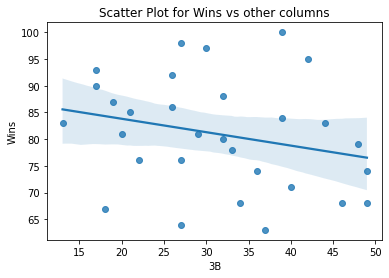

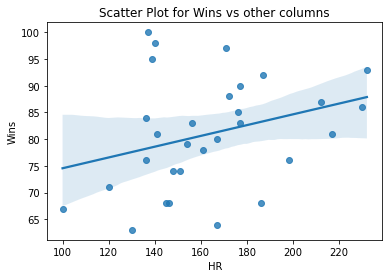

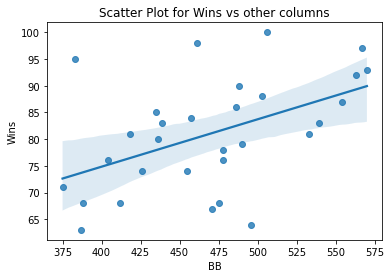

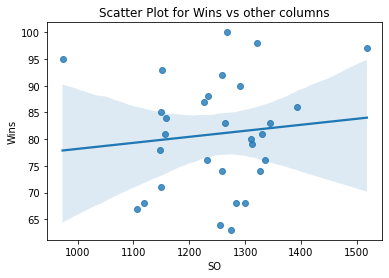

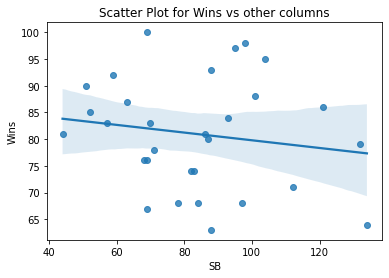

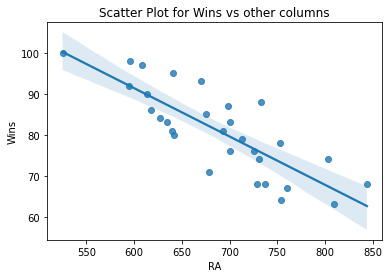

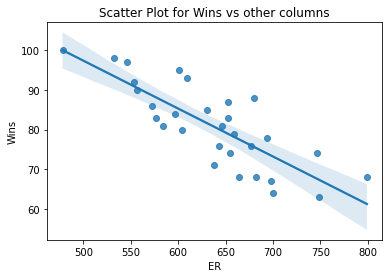

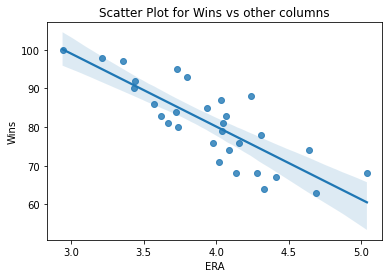

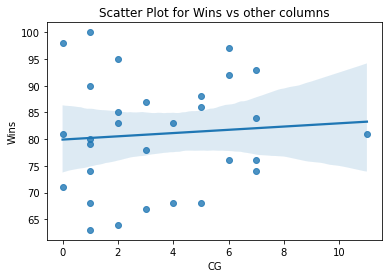

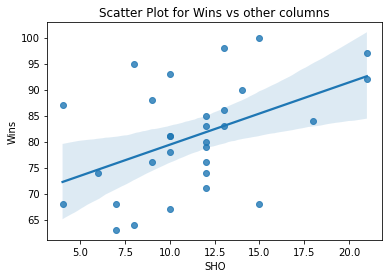

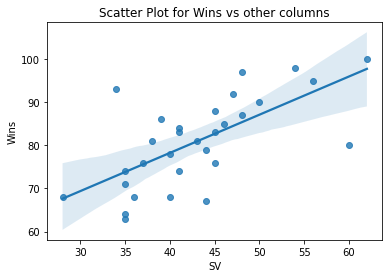

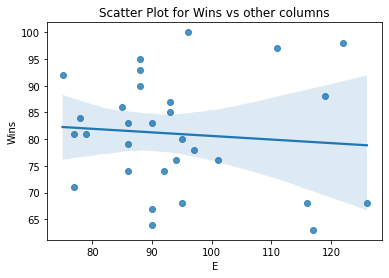

In [16]:
#Checking how W is variated with all columns separately
for i in df.columns[1:]:                                          
    plt.figure(figsize = (6, 4))
    sns.regplot(df[i], df['W'])
    plt.title('Scatter Plot for Wins vs other columns')
    plt.xlabel(i)
    plt.ylabel('Wins')
    plt.show()

* RA, ER, ERA showed strong negative relationship with W.




* R, 2B, HR, BB, SHO, SV showed positive linear relation with W but with a small slope.




* E, CG, AB, H, SO, 3B, SB showed less relationship with W.

# Multi Variate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

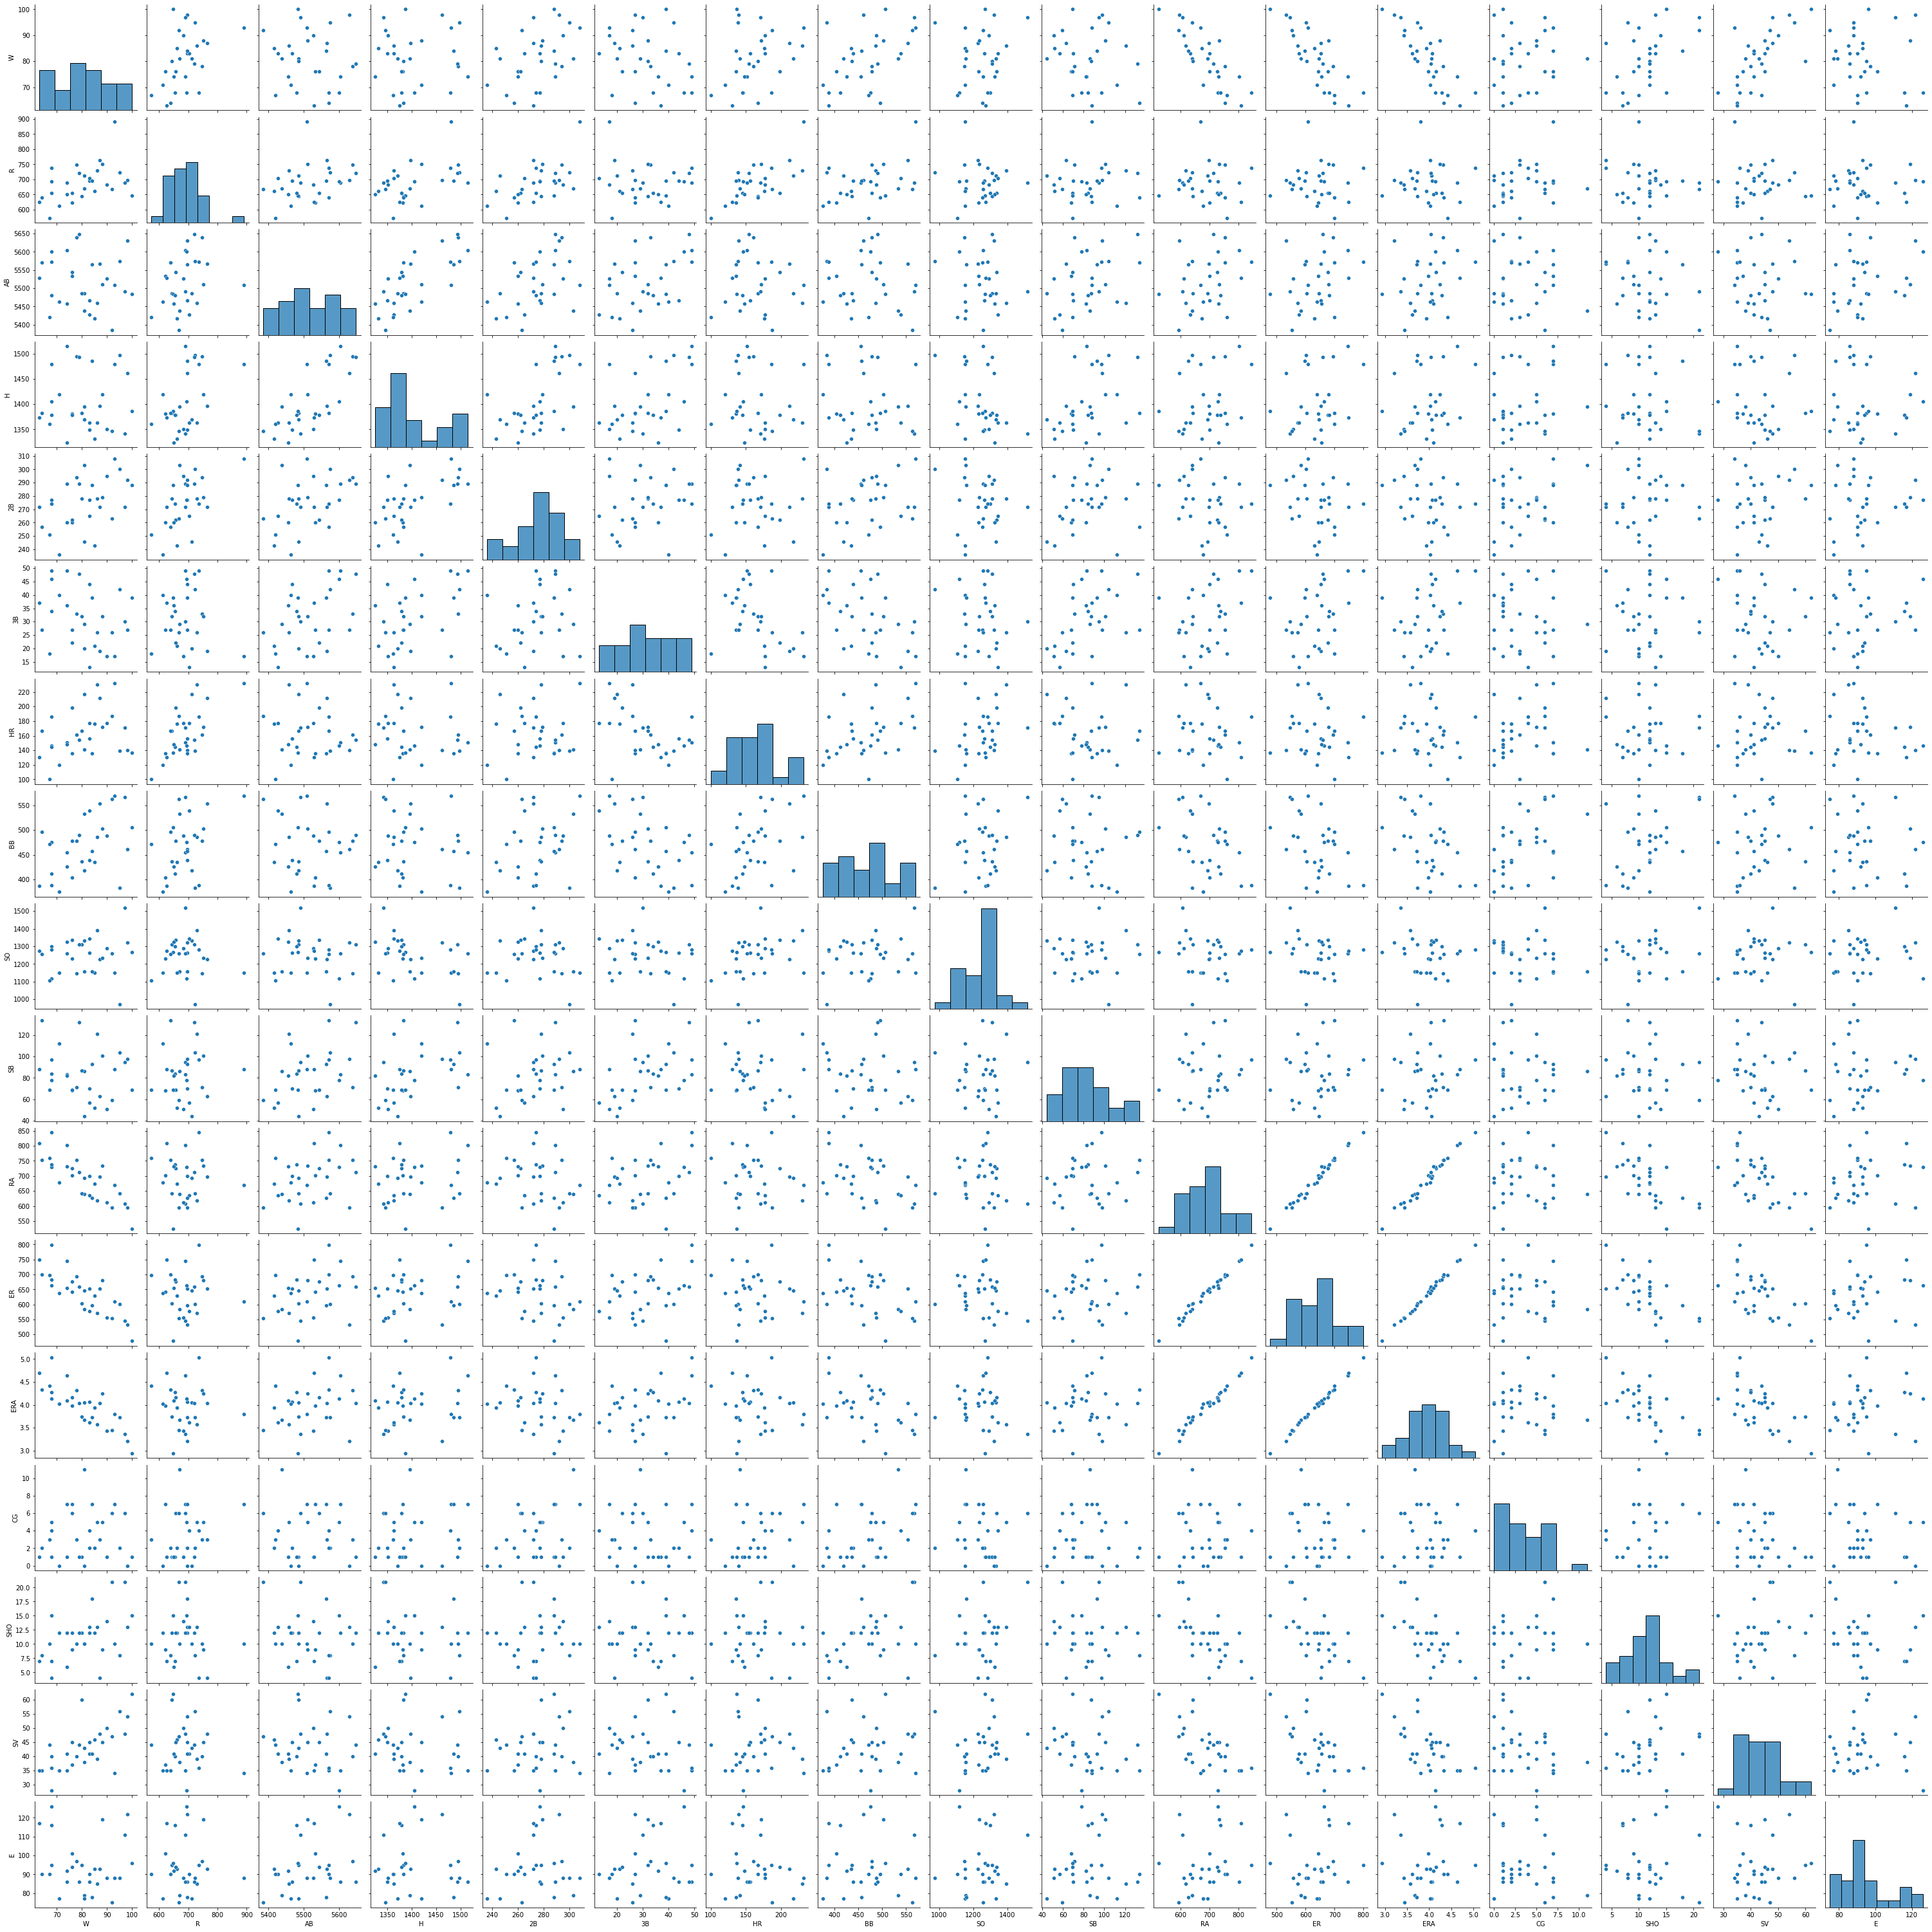

In [17]:
#Checking normal distribution of each column
sns.pairplot(df) 
plt.show

* Pairplot has been constructed above to show us the distribution of each variables and also to show the relationship between
  each of the two variables
 
* Variables RA, ER, 3B and ERA are in negative linear correlation to the Wins. Variables SV, SHO, BB, HR and R are in positive   correlation to the Wins. This is the observation from the above graph. For better understanding of correlated variables, 
  Let's understand data and use heatmap to see correlations.

# Checking Correlation

In [18]:
#Checking Correlation
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


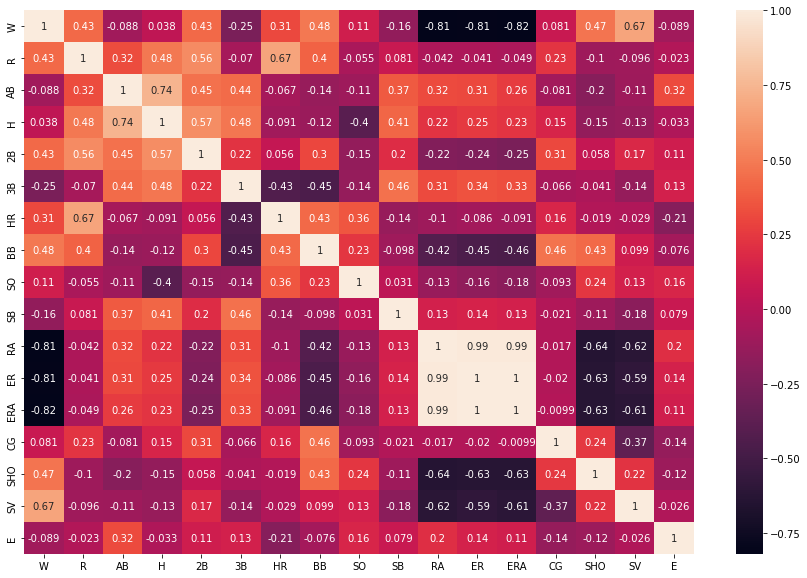

In [19]:
#Heatmap for correlation
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(),annot=True)
plt.show()

* as we can see there is issue of multi colliniarity between multiple features.

* features are:RA and ER,RA and ERA,ER and ERA,(R,AB and H)

* we can cross check the same using the variance inflaction factor.

**The positive trend can be seen with target**


1) Saves
2) Walks
3) Shutouts
4) Runs
5) Doubles
6) Homeruns


**Following are moderately affecting the target**


1) CG
2) Hits
3) At bats
4) Errors



**The rest are negatively affecting the target**

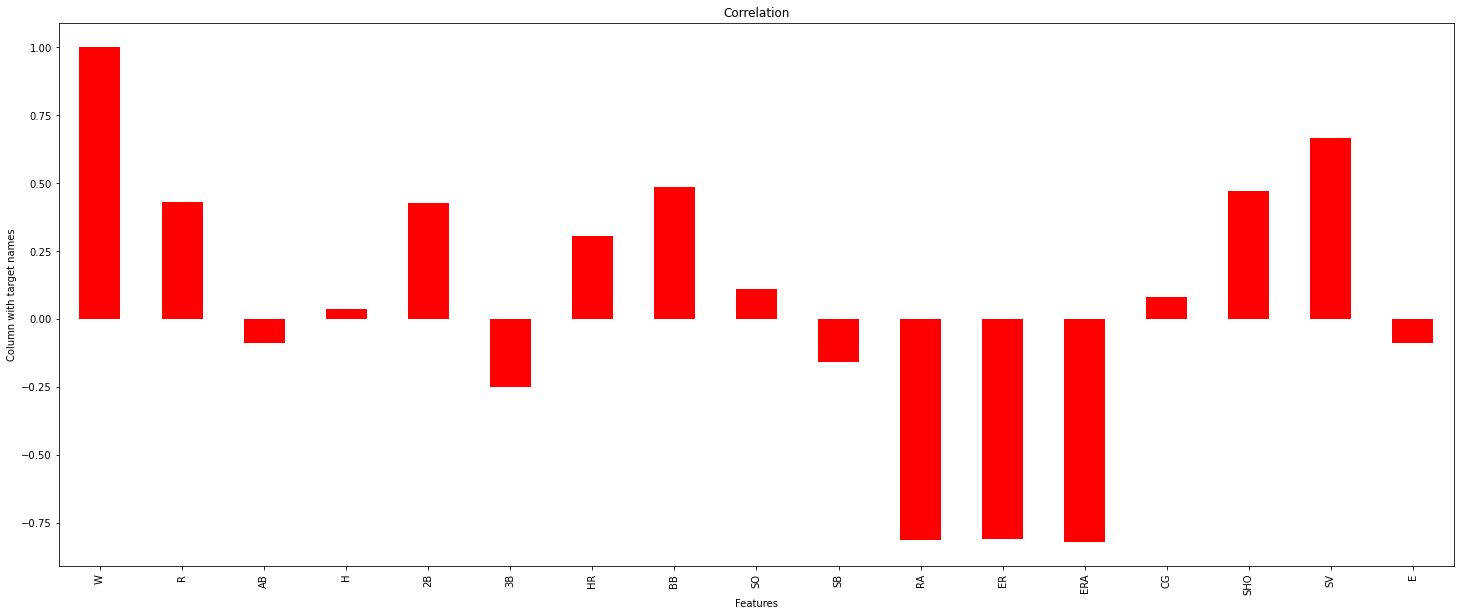

In [20]:
#barplot for correlation
plt.figure(figsize = (25, 10))
df.corr()['W'].plot(kind = 'bar', color = 'r')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()


* As we can see from the correlation matrix and the graph, ER, RA, ERA have the strongest correlation with wins but in negative nature.




* In positive side SV has the highest correlation of 0.67 followed by BB, SHO, R, 2B all above 0.4.



* Even though ER, RA and ERA are very negatively correlated with wins but they showed highest correlation amongst themselves of over 0.99.




* E, CG, H, AB showed less correlated with W.

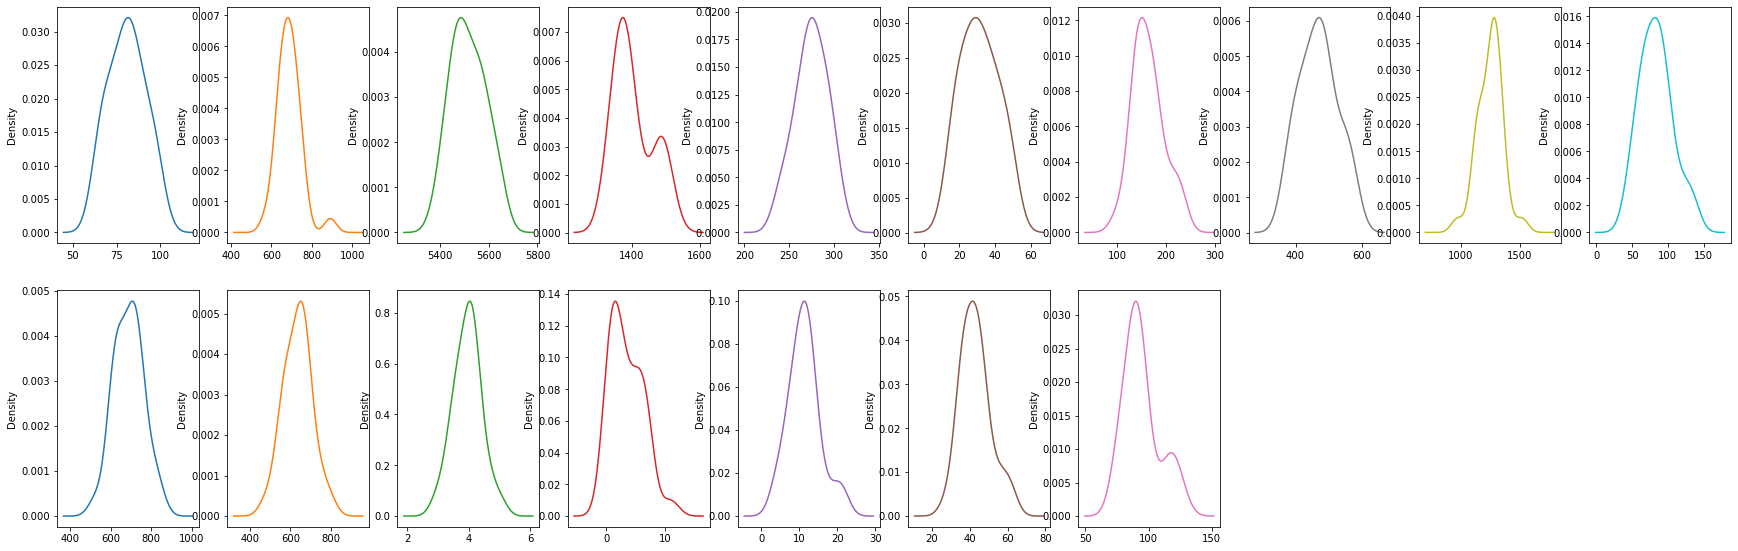

In [21]:
#Visualizing skewness on density graph
#Example of multi variate analysis
df.plot(kind='density',subplots=True,layout=(4,10),legend=False,sharex=False,figsize=(30,20))
plt.show()

* We can observe that most of our data is normally distributed. Hardly, any skewness can be seen.

# Checking outliers using Boxplot

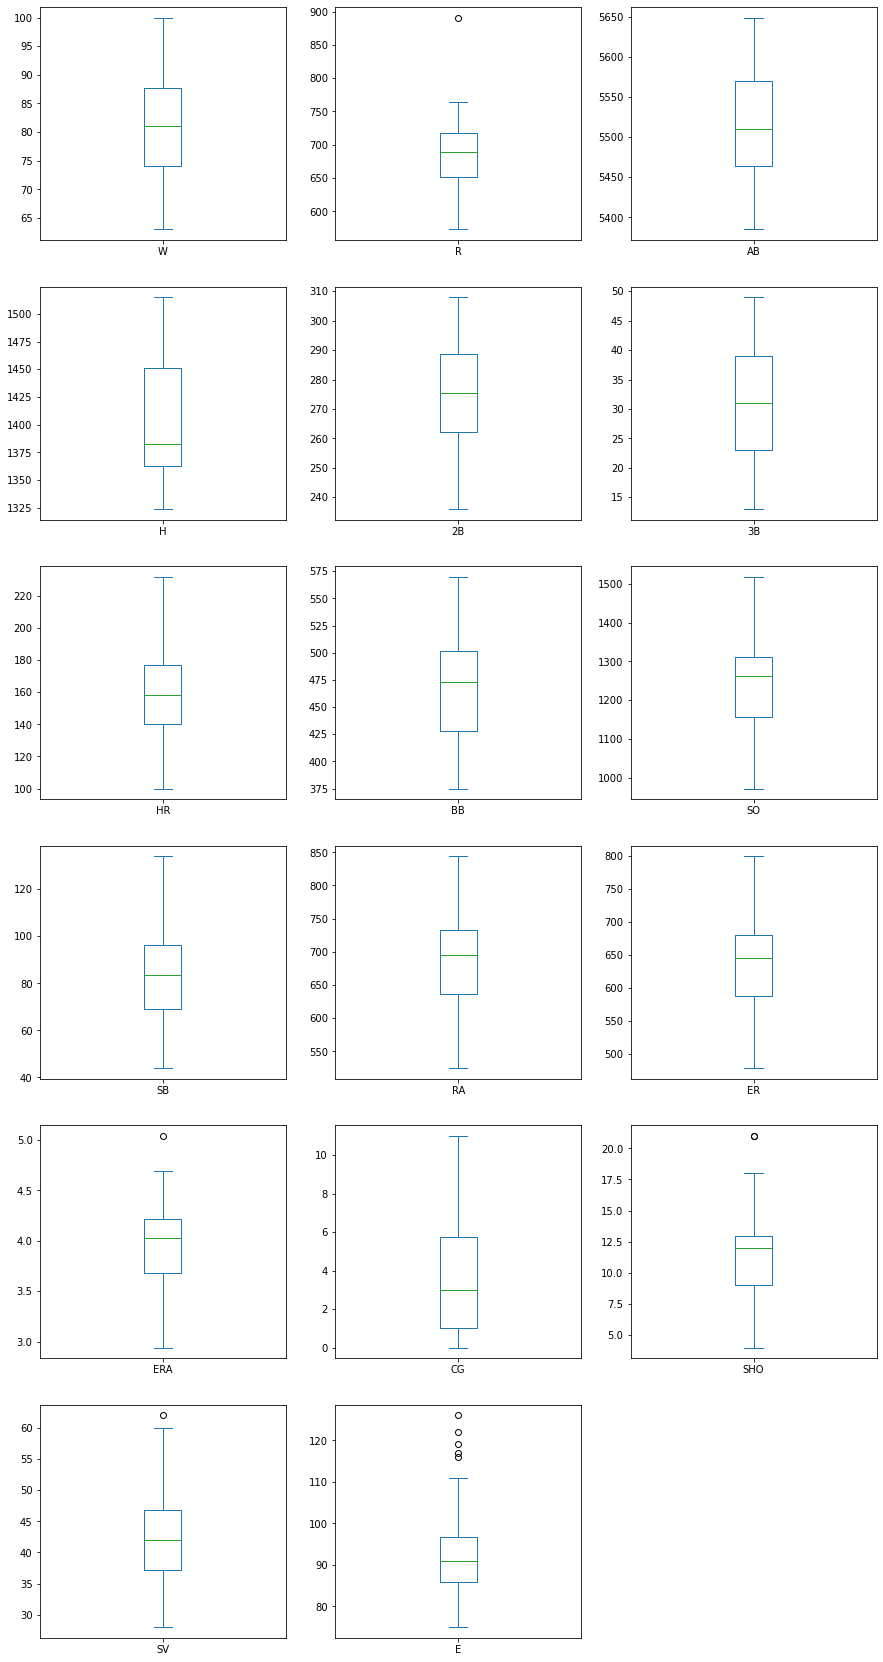

In [19]:
#Plotting bosplot to check the outliers in the datset
df.plot(kind='box',subplots= True,layout=(6,3),figsize=(15,30))
plt.show()

* In E there are more outliers and SV, SHO, ERA, R have single outlier. Lets try to remove outliers and check the amount of data is removed.

* Outliers are present in columns like 'Errors','Shut Outs','Saves','Earned Run Average','Runs Scored'.But there are not to many outliers present in it.So we will just replace outilers in 'Error' column.Other columns with negligible outliers will no affect our model approach.

# Removing Outliers

In [20]:
# z score technique
from scipy.stats import zscore
z=np.abs(zscore(df))

In [21]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 17)
(29, 17)


In [22]:
loss_percent=((30-29)/30)*100
loss_percent

3.3333333333333335

* Only 3.33% data is removed so we remove the data.

# Dealing with Skewness

In [24]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

* R, H, CG, SHO, SV, E all seems to have skewness higher than the threshold value of +-0.5, we need to treat the skewness present in the data.

# Splitting data into train(x) and test(y)

In [25]:
x = df_new.drop('W', axis = 1)
y = df_new['W']

In [26]:
#removing skewness
from sklearn.preprocessing import power_transform 
#using yeo-johnson method due to presence of negative skewness
x_new = power_transform(x, method='yeo-johnson')        
x_new = pd.DataFrame(x_new, columns = x.columns)

In [27]:
x_new.skew()

R     -0.024842
AB     0.000000
H      0.000000
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
RA    -0.011974
ER    -0.004988
ERA   -0.000401
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

* Skewness has been removed using power transform

In [28]:
#To Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x_new)

* Here the data is normalized between 0 and 1

In [29]:
#checking shape of x and y
print(x.shape)
print(y.shape)

(29, 16)
(29,)


# Checking Best Random State

* Now checking train_test_split after removing the multicolliniarity issue using vif.

In [30]:
maxr2score = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predLR = LR.predict(x_test)
    r2 = r2_score(y_test, predLR)
    if r2>maxr2score:
        maxr2score = r2
        maxRS = i
print ('Max R2 score obtained is', maxr2score, 'on Random State', maxRS)

Max R2 score obtained is 0.9337130346280044 on Random State 476


# Creating Model

In [ ]:
#seprating the train and test datasets with the best find random state
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=476)

In [33]:
models=[LinearRegression(),
        Lasso(), Ridge(),
        ElasticNet(),
        SVR(),
        DecisionTreeRegressor(),
        KNeighborsRegressor(),
        RandomForestRegressor(),
        AdaBoostRegressor(),
        GradientBoostingRegressor(),
      ]
model_names=['LinearRegression',
        'Lasso', 'Ridge',
        'ElasticNet',
        'SVR',
        'DecisionTreeRegressor',
        'KNeighborsRegressor',
        'RandomForestRegressor',
        'AdaBoostRegressor',
        'GradientBoostingRegressor']

r2=[]
mae=[]
mse=[]
rmse=[]
d={}

for i in range(len(models)):
    mod=models[i]
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    r2.append(r2_score(y_test, pred))
    mse.append(mean_squared_error(y_test, pred))
    mae.append(mean_absolute_error(y_test, pred))
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    
    
d={'Model':model_names,'R2_score':r2,
   'mean_absolute_error':mae,
   'mean_squared_error':mse,
   'root_mean_squared_error':rmse}
acc_frame=pd.DataFrame(d)
acc_frame

,Model,R2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
0,LinearRegression,0.934032,2.664512,10.042955,3.169062
1,Lasso,0.873203,3.654032,19.303641,4.393591
2,Ridge,0.908490,2.850653,13.931546,3.732499
3,ElasticNet,0.814695,4.239468,28.210875,5.311391
4,SVR,0.082436,10.327251,139.689886,11.819048
5,DecisionTreeRegressor,0.435102,8.400000,86.000000,9.273618
6,KNeighborsRegressor,0.603074,6.500000,60.428000,7.773545
7,RandomForestRegressor,0.576780,6.556000,64.430940,8.026889
8,AdaBoostRegressor,0.642286,5.874524,54.458395,7.379593
9,GradientBoostingRegressor,0.619224,6.660563,57.969328,7.613759


* Linear regression have bext r2_score and less errors compare to remaining models. But we check Cross_validation_score for best Model.

# Checking Cross Validation score

* Here we check cross validation score to find the best Regression Model

In [34]:
from sklearn.model_selection import cross_val_score
cross=[]
for model in range(len(models)):
    scr=cross_val_score(models[model],x,y,cv=5)
    cross.append(scr.mean())   
difference={'Model':model_names,'R2_score':r2,"Cross_val_score":cross}
acc_frame=pd.DataFrame(difference)
acc_frame

,Model,R2_score,Cross_val_score
0,LinearRegression,0.934032,0.376132
1,Lasso,0.873203,0.510069
2,Ridge,0.908490,0.466468
3,ElasticNet,0.814695,0.408247
4,SVR,0.082436,-0.293530
5,DecisionTreeRegressor,0.435102,-2.688144
6,KNeighborsRegressor,0.603074,0.118202
7,RandomForestRegressor,0.576780,-0.717026
8,AdaBoostRegressor,0.642286,-0.943399
9,GradientBoostingRegressor,0.619224,-1.383872


# Hyper parameter Tuning the Model

In [36]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in GridSearchCV
parameters= {
    'alpha':[.00001, 0.0001,0.001, 0.01],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'positive':[True,False],
    'selection':['cyclic','random'],
    }

In [37]:
GCV= GridSearchCV(Lasso(),parameters, cv = 5)  #Tuning LASSO
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01],
                         'fit_intercept': [True, False],
                         'normalize': [True, False], 'positive': [True, False],
                         'selection': ['cyclic', 'random']})

In [38]:
model = Lasso(alpha=0.001,fit_intercept= True, normalize = True, positive= False, selection = 'cyclic')
model.fit(x_train, y_train)
pred = model.predict(x_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
print (mean_absolute_error(y_test, pred))

0.9344048767849561
9.986201558258289
2.562370188947675


# Lets plot the final Graph for Actual and Predicted output values

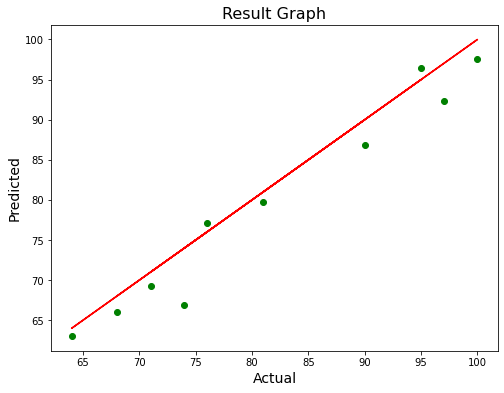

In [39]:
# Final output Graph
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color="g")
plt.plot(y_test,y_test,color="r")
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title("Result Graph",fontsize=16)
plt.show()

# Saving the Model

In [41]:
import pickle, joblib

filename = 'Baseball.pkl'
pickle.dump(model, open(filename, 'wb'))

# Conclusion




# Loading the Model

In [42]:
lasso=joblib.load('Baseball.pkl')
Predicted = lasso.predict(x_test)
Predicted

array([66.08041535, 77.07792501, 69.25617703, 86.81453162, 66.92987622,
       96.39632973, 63.0450966 , 97.57651261, 92.34446905, 79.80347439])

In [43]:
Final=np.array(y_test)
Final

array([ 68,  76,  71,  90,  74,  95,  64, 100,  97,  81], dtype=int64)

In [44]:
predict=np.array(lasso.predict(x_test))
predict

array([66.08041535, 77.07792501, 69.25617703, 86.81453162, 66.92987622,
       96.39632973, 63.0450966 , 97.57651261, 92.34446905, 79.80347439])

In [45]:
df_pred=pd.DataFrame({"original":Final,"predicted":predict},index=range(len(Final)))
df_pred

,original,predicted
0,68,66.080415
1,76,77.077925
2,71,69.256177
3,90,86.814532
4,74,66.929876
5,95,96.396330
6,64,63.045097
7,100,97.576513
8,97,92.344469
9,81,79.803474
